A DataSet of Supply Chains used by the company DataCo Global was used for the analysis. Dataset of Supply Chain , which allows the use of Machine Learning Algorithms and PowerBI Dashboard. 

The objective of this analysis is to predict late delivery risk that the company faced.

## Data Description :

## Importing Dataset and Libraries

In [2]:
import pandas as pd # data analysis and mmanipulation library
import numpy as np # library to work with arrays and matrices


#Data Visualization Libraries  
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, ShuffleSplit
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, roc_curve, auc, classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"DataCoSupplyChainDataset.csv",header= 0,encoding='unicode_escape')

In [4]:
df.shape #number of observations and attributes  

(180519, 53)

In [5]:
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [7]:
df.describe().T #5 number summary

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


In [8]:
df['Shipping Mode'].unique()
df['Shipping Mode'].value_counts()

Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

## Data Preprocessing

Checking attributes for number of unique values less than 2 as they give no information for our models.  

In [9]:
dfunique= df.nunique().sort_values(ascending= True, na_position='first')
dfunique.head()
#dfunique.to_frame().reset_index().rename(columns={'index': 'Attribute', 0: 'Unique Values'}).head().to_csv('unique1.csv', index=False)

Product Description    0
Customer Password      1
Product Status         1
Customer Email         1
Late_delivery_risk     2
dtype: int64

In [10]:
df.drop(dfunique.index[np.where(dfunique < 2)], axis=1, inplace=True)

Checking low variance for possible no information attributes. 

In [11]:
df.select_dtypes(include='number').var().sort_values().head()
#df.var().sort_values().head().to_frame().reset_index().rename(columns={'index': 'Attribute', 0: 'Variance'}).to_csv('variance.csv', index=False)

Order Item Discount Rate         0.004958
Order Item Profit Ratio          0.217898
Late_delivery_risk               0.247669
Days for shipment (scheduled)    1.889111
Order Item Quantity              2.112521
dtype: float64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
dfna= df.isna().sum().sort_values(ascending=False)
dfna.head()

Order Zipcode               155679
Customer Lname                   8
Customer Zipcode                 3
Type                             0
Days for shipping (real)         0
dtype: int64

Dropped any attribute that have more na values than non-na values.  

In [14]:
df.drop(dfna.index[np.where(dfna > df.shape[0]/2)], axis = 1, inplace= True)

Filled numeric attributes that have na values with corresponding mean value of the attribute.

In [15]:
num= df.select_dtypes('number')
df[num.columns] = num.fillna(num.mean())

Then filled remaining na values in categorical attributes with a string.

In [16]:
df = df.fillna('')

In [17]:
df.isna().sum().sum()

np.int64(0)

In [18]:
df.drop(["Product Image", "Order Item Cardprod Id", "Order Item Id", "Product Card Id", "Category Id", "Customer Country", "Customer State", "Customer Street", "Department Id", "Customer Fname", "Order Item Discount", "Product Category Id"], axis = 1, inplace= True)

Checking correlation between attributes to see whether different attributes give the same or similar information in the dataset.

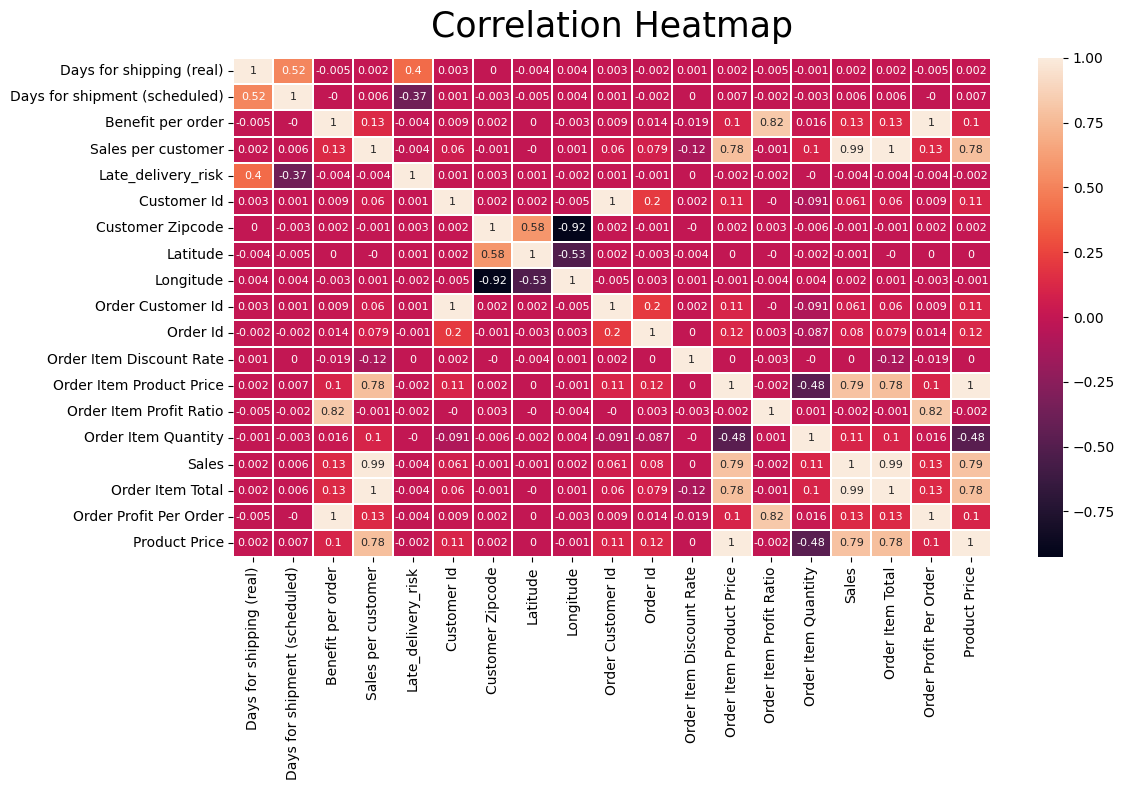

In [19]:
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(round(numeric_df.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8})
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()
#plt.savefig('Correlation Heatmap.png', dpi=200)

In [20]:
# Retain upper triangular values of correlation matrix and make Lower triangular values Null
upper_corr_mat = numeric_df.corr().where(np.triu(np.ones(numeric_df.corr().shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()

# Sort correlation pairs
unique_corr_pairs.sort_values(ascending= False).head(10)

Order Customer Id        Customer Id                 1.000000
Product Price            Order Item Product Price    1.000000
Order Item Total         Sales per customer          1.000000
Order Profit Per Order   Benefit per order           1.000000
Sales                    Sales per customer          0.989744
Order Item Total         Sales                       0.989744
Order Item Profit Ratio  Benefit per order           0.823689
Order Profit Per Order   Order Item Profit Ratio     0.823689
Sales                    Order Item Product Price    0.789948
Product Price            Sales                       0.789948
dtype: float64

In [21]:
#unique_corr_pairs.sort_values(ascending= False).head(10).to_frame().reset_index().rename(columns={'level_0': 'Attribute1', 'level_1': 'Attribute2' , 0: 'Correlation'}).to_csv('High Correlation.csv', index=False)

In [22]:
cortable= unique_corr_pairs.sort_values(ascending= False).reset_index()
drop_corr= cortable[cortable.iloc[:,2] > 0.85]["level_1"].values.tolist()
drop_corr

['Customer Id',
 'Order Item Product Price',
 'Sales per customer',
 'Benefit per order',
 'Sales per customer',
 'Sales']

In [23]:
df.drop(drop_corr, axis=1, inplace=True)

In [24]:
df.shape

(180519, 31)

In [25]:
df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Delivery Status                   object
Late_delivery_risk                 int64
Category Name                     object
Customer City                     object
Customer Lname                    object
Customer Segment                  object
Customer Zipcode                 float64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
order date (DateOrders)           object
Order Id                           int64
Order Item Discount Rate         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Order Item Total                 float64
Order Profit Per Order           float64
Order Region    

Changing the data type of  object attributes to categorical and date attributes to datetime.

In [26]:
col_types = {'Customer Lname':'category', 'Customer City':'category', 'Order State':'category' ,'Type':'category', 'Delivery Status':'category', 'Category Name':'category', 'Customer Segment':'category', 'Department Name':'category', 'Market':'category', 'Order Region':'category', 'Order Status':'category', 'Product Name':'category', 'Shipping Mode':'category', 'Order City':'category', 'Order Country':'category'}
df = df.astype(col_types)

In [27]:
df["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"], infer_datetime_format=True)
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"], infer_datetime_format=True)

In [28]:
df.dtypes

Type                                   category
Days for shipping (real)                  int64
Days for shipment (scheduled)             int64
Delivery Status                        category
Late_delivery_risk                        int64
Category Name                          category
Customer City                          category
Customer Lname                         category
Customer Segment                       category
Customer Zipcode                        float64
Department Name                        category
Latitude                                float64
Longitude                               float64
Market                                 category
Order City                             category
Order Country                          category
Order Customer Id                         int64
order date (DateOrders)          datetime64[ns]
Order Id                                  int64
Order Item Discount Rate                float64
Order Item Profit Ratio                 

## Exploratory Data Analysis

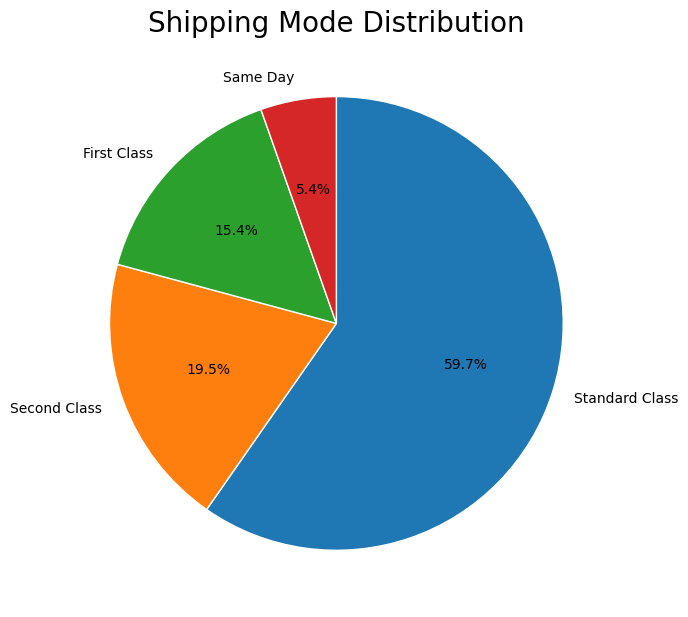

In [29]:
plt.subplots(figsize=(7,7))
plt.pie(df['Shipping Mode'].value_counts(),
    labels= dict(df['Shipping Mode'].value_counts()).keys(),
    autopct= '%1.1f%%',
    startangle= 90,
    counterclock=False,
    wedgeprops = {'edgecolor' : 'white'})
plt.title('Shipping Mode Distribution', size= 20)
plt.tight_layout()
#plt.savefig('shipping mode.png',dpi=200)
plt.show();


Standard class shipping is the highest share among all shipping modes as expected covering more than half of the shipping. It is followed by second class, first class and same day shipping respectively.

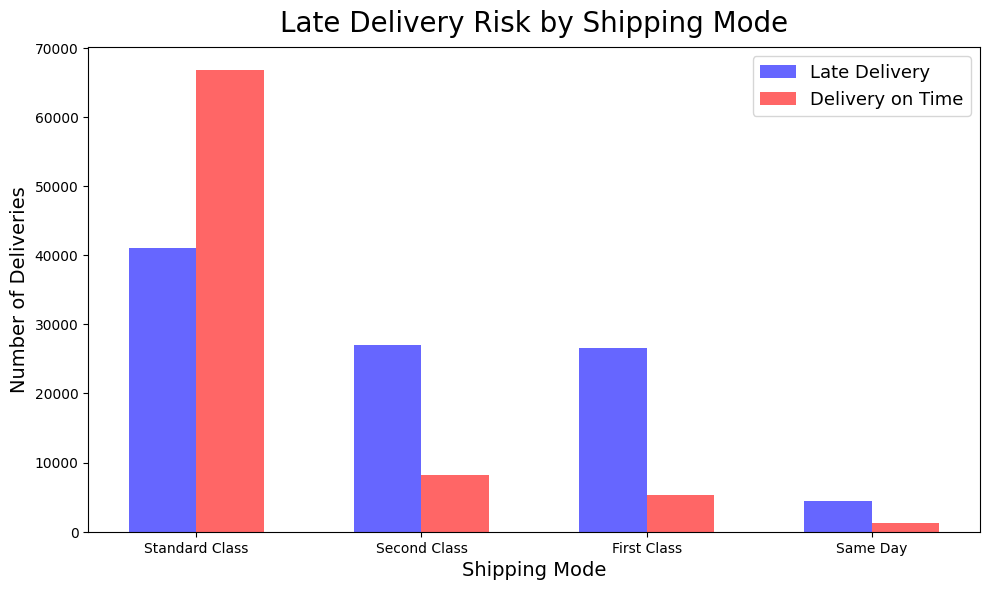

In [30]:
late = df[(df['Late_delivery_risk'] == 1)]
ontime = df[(df['Late_delivery_risk'] == 0)]
count1=late['Shipping Mode'].value_counts()
count2=ontime['Shipping Mode'].value_counts()
names=df['Shipping Mode'].value_counts().keys()
fig,ax = plt.subplots(figsize=(10,6))
index=np.arange(4)
bar_width=0.3
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Late Delivery')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Delivery on Time')
plt.xlabel('Shipping Mode', fontsize= 14)
plt.ylabel('Number of Deliveries', fontsize= 14)
plt.title('Late Delivery Risk by Shipping Mode', fontsize= 20, y=1.015)
plt.legend(fontsize= 13)
plt.xticks(index+bar_width/2,names)
plt.tight_layout()
#plt.savefig('late delivery risk - shipping mode.png',dpi=200)
plt.show();

First class and same day shipping modes are offering more luxury delivery options. However, proportion of late delivery among those categories are higher than standard class delivery.

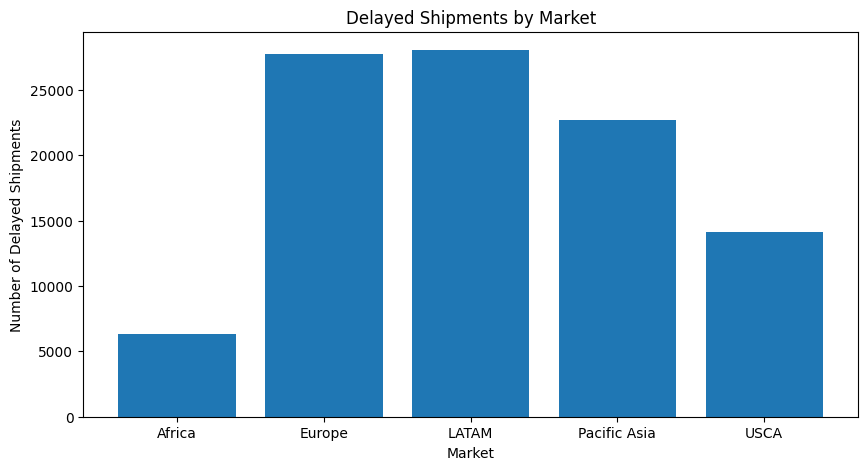

In [31]:
delayed= df[df['Late_delivery_risk'] == 1]
condition1 = delayed.groupby('Market').size().reset_index(name='Count')
condition2 = delayed.groupby('Department Name').size().reset_index(name='Count')

# plot the delayed shipments by country
plt.figure(figsize=(10,5))
plt.bar(condition1['Market'], condition1['Count'])
plt.title('Delayed Shipments by Market')
plt.xlabel('Market')
plt.ylabel('Number of Delayed Shipments')
plt.show()

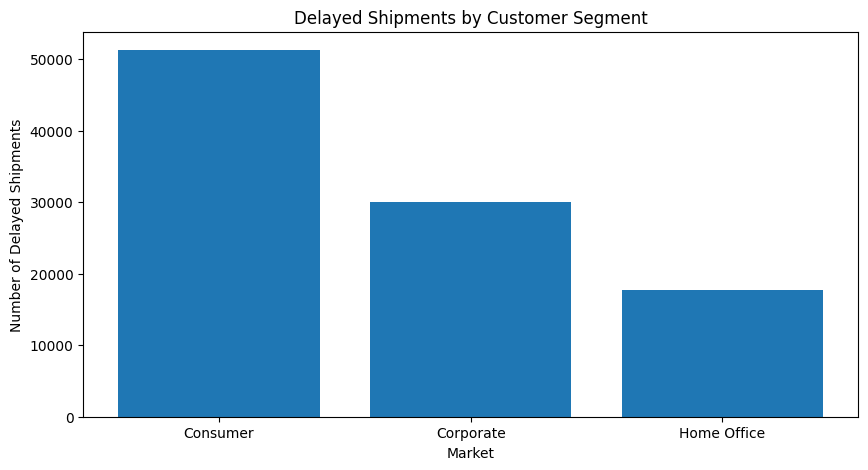

In [32]:
delayed = df[df['Late_delivery_risk'] == 1]
condition1 = delayed.groupby('Customer Segment').size().reset_index(name='Count')
condition2 = delayed.groupby('Department Name').size().reset_index(name='Count')

# plot the delayed shipments by country
plt.figure(figsize=(10,5))
plt.bar(condition1['Customer Segment'], condition1['Count'])
plt.title('Delayed Shipments by Customer Segment')
plt.xlabel('Market')
plt.ylabel('Number of Delayed Shipments')
plt.show()

## Encoding Date Variables & Feature Selection

In [33]:
df["ship_year"]= df["shipping date (DateOrders)"].dt.year
df["ship_month"]= df["shipping date (DateOrders)"].dt.month
df["ship_day"]= df["shipping date (DateOrders)"].dt.day
df["ship_hour"]= df["shipping date (DateOrders)"].dt.hour
df.drop(["shipping date (DateOrders)"], axis = 1, inplace= True)

In [34]:
df["order_year"]= df["order date (DateOrders)"].dt.year
df["order_month"]= df["order date (DateOrders)"].dt.month
df["order_day"]= df["order date (DateOrders)"].dt.day
df["order_hour"]= df["order date (DateOrders)"].dt.hour
df.drop(["order date (DateOrders)"], axis = 1, inplace= True)

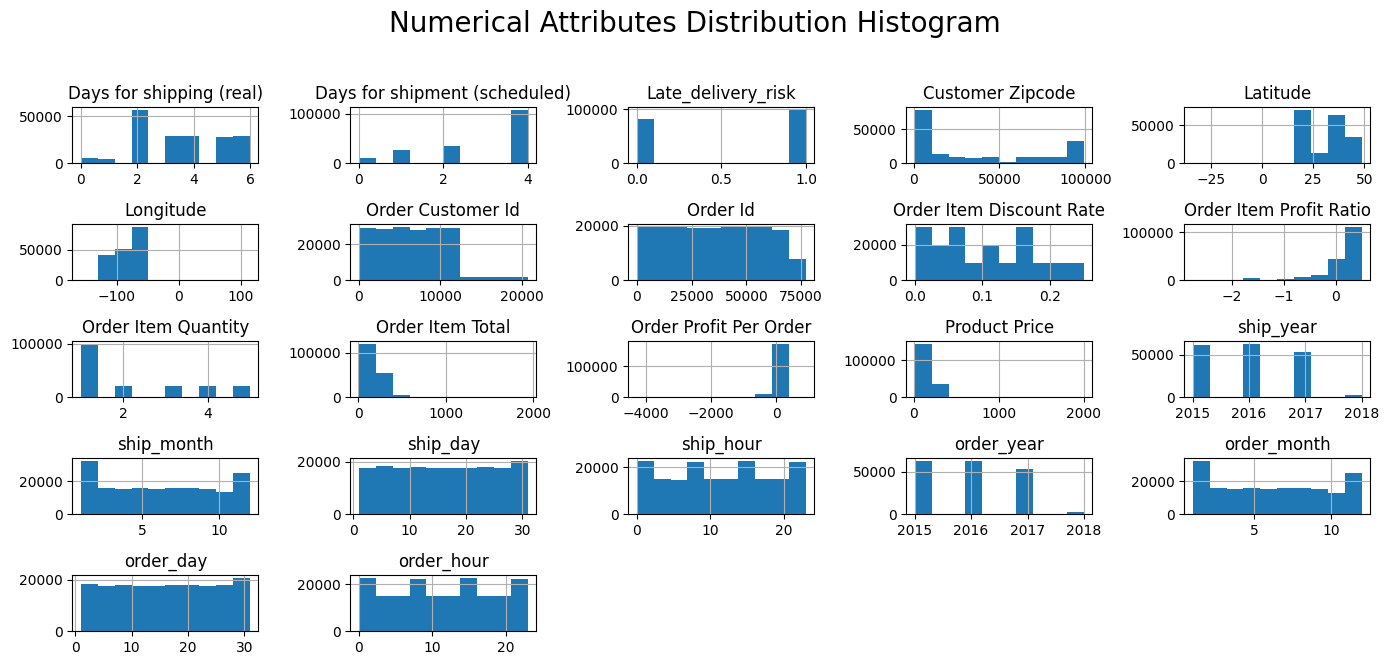

In [35]:
df.hist(figsize=(14,6))
plt.tight_layout()
plt.suptitle('Numerical Attributes Distribution Histogram', size= 20, y= 1.1)
#plt.savefig('Numerical Attributes Distribution Histogram.png',dpi=200)
plt.show();

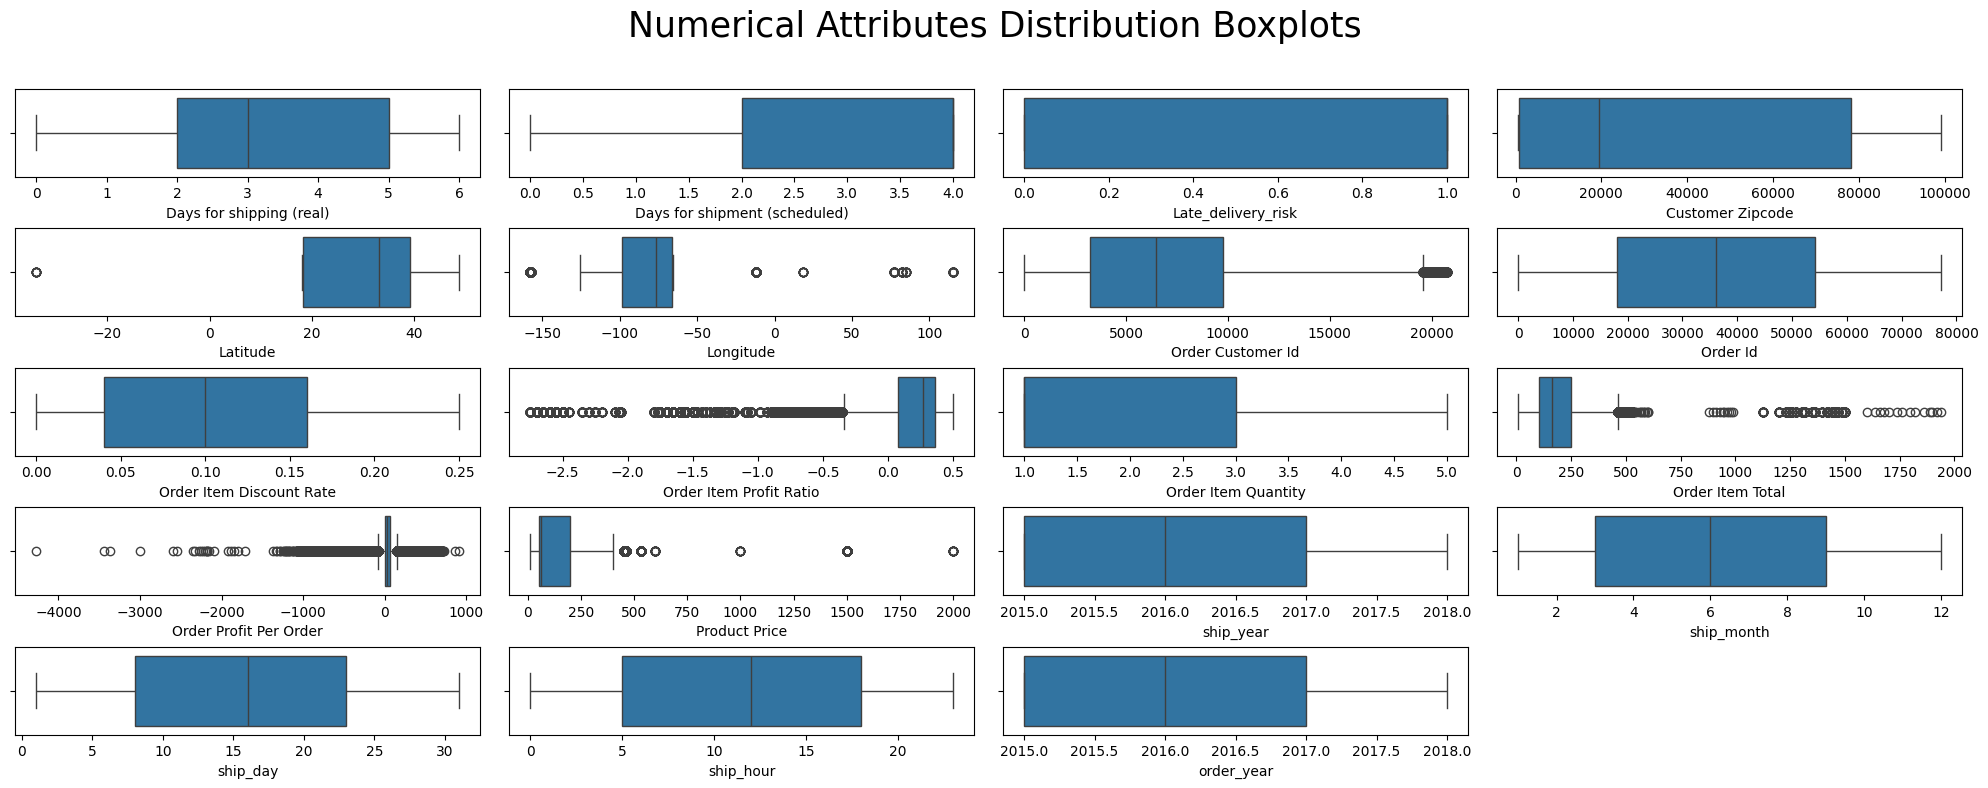

In [36]:
fig, axes = plt.subplots(5,4,figsize=(20,8))
fig.delaxes(axes[4][3])
numdf= df.select_dtypes(exclude="category")
for attr, ax in zip(numdf.columns, axes.flatten()):
    sns.boxplot(x=attr, data=numdf, ax=ax)
    
plt.tight_layout()
fig.suptitle('Numerical Attributes Distribution Boxplots', size= 25) 
fig.subplots_adjust(top=0.88)
#plt.savefig('Numerical Attributes Distribution Boxplots.png',dpi=200)

plt.show();

In [37]:
# Categorical Attributes
df.select_dtypes(include="category").columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Lname', 'Customer Segment', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Order Status', 'Product Name', 'Shipping Mode'],
      dtype='object')

In [38]:
# Numerical Attributes
df.select_dtypes(exclude="category").dtypes

Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Late_delivery_risk                 int64
Customer Zipcode                 float64
Latitude                         float64
Longitude                        float64
Order Customer Id                  int64
Order Id                           int64
Order Item Discount Rate         float64
Order Item Profit Ratio          float64
Order Item Quantity                int64
Order Item Total                 float64
Order Profit Per Order           float64
Product Price                    float64
ship_year                          int32
ship_month                         int32
ship_day                           int32
ship_hour                          int32
order_year                         int32
order_month                        int32
order_day                          int32
order_hour                         int32
dtype: object

## Encoding Categorical Attributes

I used two encoding methods for converting categorical attributes to numerical attributes. One hot encoding for attributes that has less than 8 unique values, and label encoding for attributes that has more than 8 unique values.

In [39]:
unique_categorical= df.select_dtypes(include="category").nunique().sort_values()
unique_categorical
#unique_categorical.to_frame().reset_index().rename(columns={'index': 'Categorical Attribute', 0: 'Unique Values'}).to_csv('Unique Value Counts of Categorical Attributes.csv', index=False)

Customer Segment       3
Type                   4
Delivery Status        4
Shipping Mode          4
Market                 5
Order Status           9
Department Name       11
Order Region          23
Category Name         50
Product Name         118
Order Country        164
Customer City        563
Order State         1089
Customer Lname      1110
Order City          3597
dtype: int64

#### One Hot Encoding

This method encodes categorical features as one-hot numeric array. Basicly, it creates a binary column for each category of the feature. 

In [40]:
dummydf= pd.get_dummies(df[list(unique_categorical.to_dict().keys())[:5]])
dummydf.head(3)

,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA
0,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False
1,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False
2,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False


In [41]:
dummydf.shape

(180519, 20)

In [42]:
df1= pd.concat([numdf, dummydf], axis =1)

#### Label Encoding

Label encoder encodes the target feature between 0 and number-of-classes minus 1. 

In [43]:
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x.astype(str))
    return x

In [44]:
label= list(unique_categorical.to_dict().keys())[5:]
labeldf=df[label].apply(Labelencoder_feature)

In [45]:
labeldf.head(3)

,Order Status,Department Name,Order Region,Category Name,Product Name,Order Country,Customer City,Order State,Customer Lname,Order City
0,2,4,15,40,78,70,66,475,483,331
1,5,4,13,40,78,69,66,841,616,391
2,1,4,13,40,78,69,452,841,627,391


In [46]:
df2= pd.concat([df1, labeldf], axis =1)

In [47]:
#removing highly correlated features in the final dataset 
upper_corr_mat1 = df2.corr().where(np.triu(np.ones(df2.corr().shape), k=1).astype(bool))
unique_corr_pairs1 = upper_corr_mat1.unstack().dropna()
unique_corr_pairs1.sort_values(ascending= False).head(10)

Delivery Status_Late delivery  Late_delivery_risk               1.000000
order_year                     ship_year                        0.994073
order_month                    ship_month                       0.952179
Shipping Mode_Standard Class   Days for shipment (scheduled)    0.945696
ship_year                      Order Id                         0.942353
order_year                     Order Id                         0.941952
order_hour                     ship_hour                        0.918932
Order Profit Per Order         Order Item Profit Ratio          0.823689
Product Price                  Order Item Total                 0.781781
Latitude                       Customer Zipcode                 0.584550
dtype: float64

In [48]:
#unique_corr_pairs1.sort_values(ascending= False).head(10).to_frame().reset_index().rename(columns={'level_0': 'Attribute1', 'level_1': 'Attribute2' , 0: 'Correlation'}).to_csv('High Correlation Encoded.csv', index=False)

In [49]:
cortable1= unique_corr_pairs1.sort_values(ascending= False).reset_index()
drop_corr1= cortable1[cortable1.iloc[:,2] > 0.85]["level_0"].values.tolist()
drop_corr1

['Delivery Status_Late delivery',
 'order_year',
 'order_month',
 'Shipping Mode_Standard Class',
 'ship_year',
 'order_year',
 'order_hour']

In [50]:
df2.drop(drop_corr1, axis=1, inplace=True)

In [51]:
df2.shape

(180519, 46)

## Machine Learning Models with Encoded Dataset

##### Classification Models with Encoded Dataset

In [52]:
# (After you have created your final dataframe 'df2' and before splitting the data)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
import pickle

# Define the final feature set X
X = df2.drop(["Late_delivery_risk"], axis=1)
X = X.loc[:, ~X.columns.str.startswith('Delivery')]
y = df2["Late_delivery_risk"]

# Save the final column order
final_columns = X.columns.tolist()
with open('final_columns.pkl', 'wb') as file:
    pickle.dump(final_columns, file)

# Identify column types for the pipeline
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='category').columns.tolist()

# Create a preprocessing pipeline
# Note: For simplicity in deployment, we will apply LabelEncoder separately
# and use OneHotEncoder for the low-cardinality features within a pipeline.
# However, your original notebook applied Label Encoding to high-cardinality features
# and OneHot to low-cardinality ones. A full pipeline is more complex.
# We will stick to your notebook's logic.

# Fit and save the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X) # Fit the scaler on the entire feature set X
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Fit and save the LabelEncoders
# You applied LabelEncoder to these columns in your notebook
label_encode_cols = list(unique_categorical.to_dict().keys())[5:]
encoders = {col: LabelEncoder().fit(df[col].astype(str)) for col in label_encode_cols}
with open('encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)
    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train_scaled = scaler.transform(X_train)



In [53]:
classifiers = [KNeighborsClassifier(),
               LogisticRegression(),
               GaussianNB(),
               RandomForestClassifier()]

In [54]:
accuracy_results_1= []
for a in classifiers:
    accuracy_results_1.append(round(accuracy_score(y_test, a.fit(X_train, y_train).predict(X_test))*100,2))#y_pred))

eval_frame2= pd.DataFrame()
eval_frame2['Model']= ["KNN", "Logistic Regression", "Naive Bayes", "Random Forest"]
eval_frame2['train_test_split']= accuracy_results_1
eval_frame2

,Model,train_test_split
0,KNN,74.37
1,Logistic Regression,54.95
2,Naive Bayes,93.37
3,Random Forest,100.00


In [55]:
accuracy_results_2= []
for a in classifiers:
    pipe = make_pipeline(StandardScaler(), a)
    accuracy_results_2.append(round(np.mean(cross_val_score(pipe, X, y, scoring= "accuracy", 
                                                          cv= KFold(), n_jobs= -1)*100),2))
eval_frame2['kfold_5']= accuracy_results_2

In [56]:
accuracy_results_3= []
for a in classifiers:
    pipe = make_pipeline(StandardScaler(), a)
    accuracy_results_3.append(round(np.mean(cross_val_score(pipe, X, y, scoring= "accuracy", 
                                                          cv= StratifiedKFold(), n_jobs= -1)*100),2))
eval_frame2['strafifiedkfold_5']= accuracy_results_3

In [57]:
accuracy_results_4= []
for a in classifiers:
    pipe = make_pipeline(StandardScaler(), a)
    accuracy_results_4.append(round(np.mean(cross_val_score(pipe, X, y, scoring= "accuracy", 
                                                          cv= ShuffleSplit(n_splits=5, test_size= 0.3), n_jobs= -1)*100),2))
eval_frame2['shuffle']= accuracy_results_4
eval_frame2

,Model,train_test_split,kfold_5,strafifiedkfold_5,shuffle
0,KNN,74.37,85.40,83.39,86.78
1,Logistic Regression,54.95,97.55,97.37,97.56
2,Naive Bayes,93.37,79.50,79.52,79.32
3,Random Forest,100.00,100.00,100.00,100.00


In [58]:
eval_frame2['average_accuracy'] = eval_frame2[['train_test_split', 'kfold_5', 'strafifiedkfold_5', 'shuffle']].mean(axis=1)
eval_frame2

,Model,train_test_split,kfold_5,strafifiedkfold_5,shuffle,average_accuracy
0,KNN,74.37,85.40,83.39,86.78,82.4850
1,Logistic Regression,54.95,97.55,97.37,97.56,86.8575
2,Naive Bayes,93.37,79.50,79.52,79.32,82.9275
3,Random Forest,100.00,100.00,100.00,100.00,100.0000


In [59]:
#eval_frame2.to_csv('encoded_classification_evaluate.csv', index=False)

In [60]:
#best_classifier= classifiers[accuracy_results_1.index(max(accuracy_results_1))]
best_classifier = LogisticRegression()

In [61]:
print(classification_report(y_test, best_classifier.fit(X_train, y_train).predict(X_test)))

              precision    recall  f1-score   support

           0       0.52      0.04      0.07     20396
           1       0.55      0.97      0.70     24734

    accuracy                           0.55     45130
   macro avg       0.54      0.50      0.39     45130
weighted avg       0.54      0.55      0.42     45130



In [62]:
#report= classification_report(y_test, best_classifier.fit(X_train, y_train).predict(X_test),output_dict=True)
#pd.DataFrame(report).T.to_csv('classification_report.csv')

Precision shows how much of our positive guesses were actually positive.

Recall gives how much positive we guessed correctly out of all positive results.

The f1-score gives the harmonic mean of precision and recall.
<div>
<img src="https://inside-machinelearning.com/wp-content/uploads/2021/09/F1-Score.png" width="400"/>
</div>

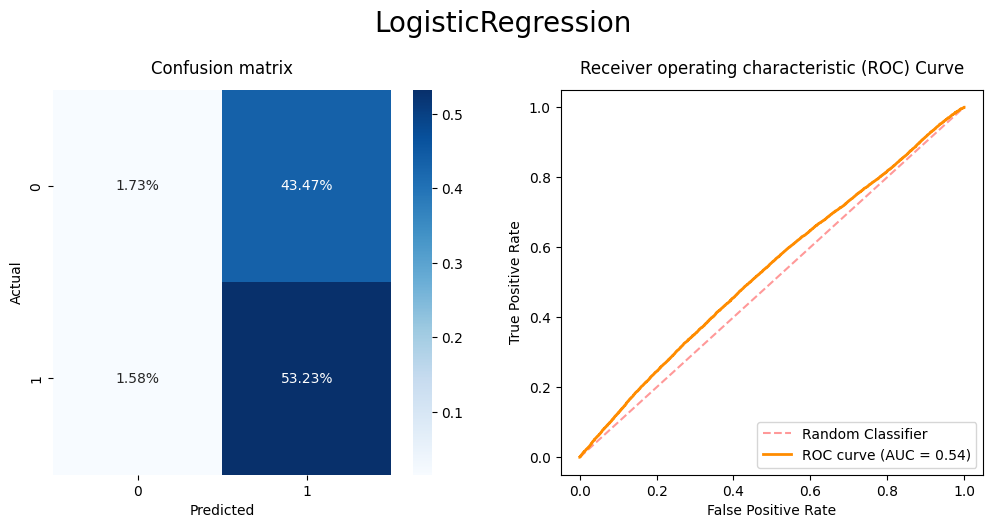

In [63]:
best_classifier.fit(X_train, y_train)
cf_matrix = confusion_matrix(y_test, best_classifier.predict(X_test))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle(str(best_classifier).split('(')[0].lstrip(), fontsize=20, y=1.04)

# Plot Confusion Matrix
ax1.set_title('Confusion matrix', y=1.02)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues', ax=ax1)
ax1.set_ylabel('Actual')
ax1.set_xlabel('Predicted')

# Plot ROC Curve
ax2.set_title('Receiver operating characteristic (ROC) Curve', y=1.02)
ax2.plot([0, 1], [0, 1], 'r--', alpha=.4, label='Random Classifier')

# Calculate ROC curve values
y_probs = best_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
ax2.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend(loc='lower right')

# Show the plot
plt.show()


ROC Curve shows the performance of a classification model at two classification thresholds; true positive rate and false positive rate. <br>
Area under the ROC Curve (AUC) gives the aggregate performance of the classification model. Our AUC for the logistic regression model covers 98% of the all performance evaluation area.

# Late_delivery_prediction 
Showing late delivery risk for the variable by using features from predictions

In [64]:
pred=best_classifier.predict(X_test)

#Converting the predicted output array to dataframe
Prediction = pd.DataFrame(pred)
prediction = Prediction.rename(columns={0:'Late Delivery Risk'})
prediction.head()

,Late Delivery Risk
0,1
1,1
2,1
3,1
4,1


Here 1 is showing there is a risk of having late delivery and 0 is showing there is no risk for delivery getting delayed.

### Feature Importance

In [65]:
feature_importance = best_classifier.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.reindex(importance_df['Importance'].abs().sort_values(ascending=False).index)
print(importance_df)

                          Feature    Importance
0        Days for shipping (real)  4.513972e-03
1   Days for shipment (scheduled) -3.397739e-03
36                   Product Name  1.981806e-03
15                      ship_hour -1.799770e-03
4                       Longitude -1.345922e-03
37                  Order Country  9.528174e-04
24      Shipping Mode_First Class  8.618368e-04
34                   Order Region  6.597820e-04
26     Shipping Mode_Second Class  5.843506e-04
35                  Category Name  5.713161e-04
14                       ship_day  3.601081e-04
3                        Latitude  3.518532e-04
16                      order_day  3.444843e-04
12                  Product Price -3.389299e-04
11         Order Profit Per Order -2.812904e-04
13                     ship_month  2.424922e-04
23                  Type_TRANSFER -2.269193e-04
21                     Type_DEBIT  1.308272e-04
33                Department Name  1.143181e-04
10               Order Item Total  1.098

From the feature importance, we know that even there are many factor that impact late delivery, the higher effect comes from shipping mode. We know that if the more shipping mode get used by the company, the higher chance that the delivery will be on time.

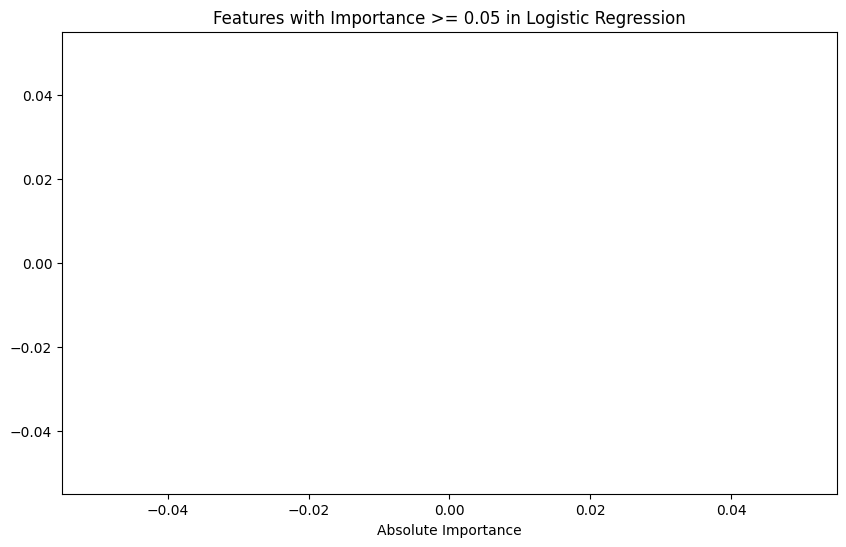

In [66]:
filtered_importance_df = importance_df[importance_df['Importance'].abs() >= 0.05]

filtered_importance_df = filtered_importance_df.reindex(filtered_importance_df['Importance'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
plt.barh(filtered_importance_df['Feature'], filtered_importance_df['Importance'].abs(), color='skyblue')
plt.xlabel('Absolute Importance')
plt.title('Features with Importance >= 0.05 in Logistic Regression')
plt.show()


In [67]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Lname,Customer Segment,Customer Zipcode,...,Product Price,Shipping Mode,ship_year,ship_month,ship_day,ship_hour,order_year,order_month,order_day,order_hour
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Holloway,Consumer,725.0,...,327.75,Standard Class,2018,2,3,22,2018,1,31,22
1,TRANSFER,5,4,Late delivery,1,Sporting Goods,Caguas,Luna,Consumer,725.0,...,327.75,Standard Class,2018,1,18,12,2018,1,13,12
2,CASH,4,4,Shipping on time,0,Sporting Goods,San Jose,Maldonado,Consumer,95125.0,...,327.75,Standard Class,2018,1,17,12,2018,1,13,12
3,DEBIT,3,4,Advance shipping,0,Sporting Goods,Los Angeles,Tate,Home Office,90027.0,...,327.75,Standard Class,2018,1,16,11,2018,1,13,11
4,PAYMENT,2,4,Advance shipping,0,Sporting Goods,Caguas,Hendricks,Corporate,725.0,...,327.75,Standard Class,2018,1,15,11,2018,1,13,11


In [68]:
import pickle

# Save the model
with open("best_classifier.pkl", "wb") as f:
    pickle.dump(best_classifier, f)
